In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dengue-cases-in-the-philippines/ph_dengue_cases2016-2020.csv


# Hello 

This project is to try and explore the data 'Dengue Cases in the Philippines 2016-2020' to serve as a start of my EDA projects.

The purpose is try to build an analysis step-by-step:
    * Load the Data
    * Clean the Data
    * Analyze the Data

# Questions to answer:

1. Which year had the most cases?
2. At which year with highest cases, which month had the most cases?
3. At which year had the highest death rate?
4. Which region had the most cases?
5. For th 4 years, which month had the most cases? is it the same month as #2?
6. Can we make regression model to predict the cases in 2025?


Above, are my initial questions regarding the data without yet analyzing it. This will be my guideline on how will I analyze the data.

In [2]:
# Loading the data to dg variable

dg = pd.read_csv('/kaggle/input/dengue-cases-in-the-philippines/ph_dengue_cases2016-2020.csv')

In [3]:
# Checking for the shape of data frame dg
dg.shape

(1020, 5)

In [4]:
# Extracting sample from the data frame
dg.sample(10)

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
777,October,2020,Region XII,76,80
301,February,2016,Region V,161,0
755,December,2018,Region XII,1149,4
189,October,2016,Region IV-A,3175,20
709,February,2020,Region XI,312,0
162,July,2019,Region III,2228,18
605,June,2016,Region X,973,4
316,May,2017,Region V,66,1
916,May,2017,CAR,57,0
130,November,2016,Region III,2207,13


In [5]:
# Checking initial infos on the data frame
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


# Data Cleaning

In this part I will try to check for my data frame for any cleaning needed: Removing duplicates, correcting data types, fixing null values, etc. 

In [6]:
# Double checking for any null data
dg.isna().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [7]:
# Changing Region to category type from object type
dg['Region'] = dg['Region'].astype('category',copy = True).copy()

In [8]:
# Rechecking info to confirm chang in dtype for 'Region'
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   object  
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(1), int64(3), object(1)
memory usage: 33.7+ KB


In [9]:
# Checking for any duplicated values
dg.duplicated(subset = ['Month', 'Region', 'Dengue_Cases']).sum()

0

# EDA

After cleaning the data, I will now proceed to do my EDA.

Reiterating questions I need to answer

# Questions to answer:

1. Which year had the most cases?
2. At the year with highest cases, which month had the most cases?
3. At which year had the highest death rate?
4. Which region had the most cases?
5. For the 4 years, which month had the most cases? is it the same month as #2?
6. Can we make regression model to predict the cases in 2025? 

In [10]:
# Grouping the data by year, to summarize the Dengue cases quantity for each year.
highest_cases = dg.groupby('Year')['Dengue_Cases'].agg('sum')
highest_cases

Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64

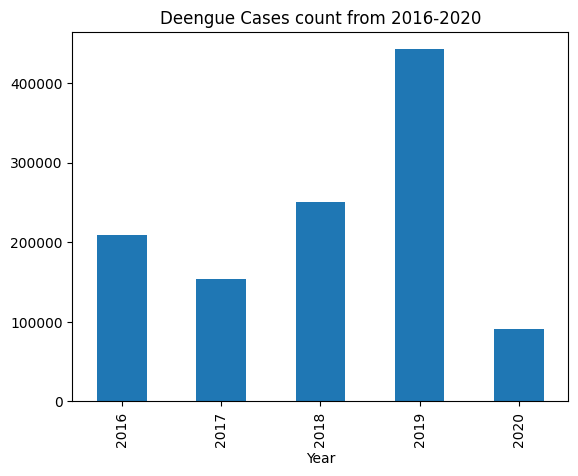

In [11]:
# Visualizing the dengue cases for each year
highest_cases.plot(kind = 'bar',
                   title = 'Deengue Cases count from 2016-2020')
plt.show()

Based on the above bar plot, the highest recorded dengue cases was in 2019, with a total quantity of 441,902 cases.

In [12]:
# Subsetting Year 2019 to analyze futher
year_2019 = dg[dg['Year'] == 2019]
month_2019c = year_2019.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending = False)
print(month_2019c)

Month
September    89642
August       85038
July         55220
October      46382
November     30097
June         25523
February     25494
December     24397
January      20672
March        19798
May          10387
April         9252
Name: Dengue_Cases, dtype: int64


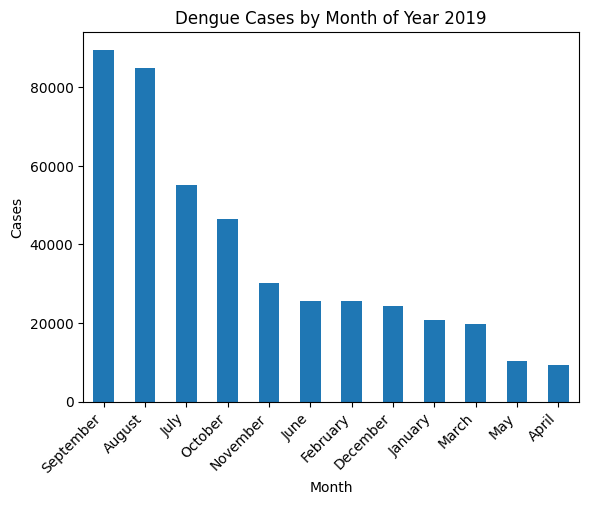

In [13]:
# Visualizing Year 2019 subset for Dengue Cases by Month
month_2019c.plot(kind = 'bar', title = 'Dengue Cases by Month of Year 2019')
plt.ylabel('Cases')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

At 2019, with the highest recorded case, the month of September had the most number of cases reaching 89,642 cases.

In [14]:
# Grouping data from 2016 -2020 by month
hdco = dg.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending = False)
print(hdco)

Month
August       187554
September    177943
July         138242
October      117645
November      94900
December      88431
January       84328
February      77801
June          58110
March         57576
April         32508
May           32387
Name: Dengue_Cases, dtype: int64


In [15]:
# Subsetting by Year with highest death
highest_death = dg.groupby('Year')['Dengue_Deaths'].agg('sum').sort_values(ascending = False)
highest_death

Year
2016    8127
2017    4563
2019    1733
2018    1226
2020    1195
Name: Dengue_Deaths, dtype: int64

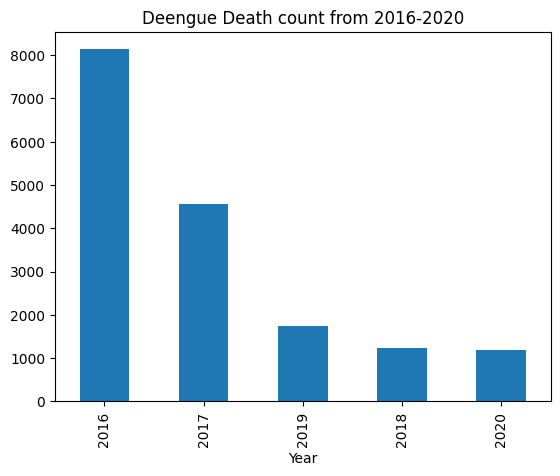

In [16]:
# Visualizing Dengue Deaths by Year
highest_death.plot(kind = 'bar', title = 'Deengue Death count from 2016-2020')
plt.show()

From the above plot, we can see that Year 2016 had the most number of Dengue Deaths. 

In [17]:
# Subsetting Year 2016 which had the most number of deaths
year_2016 = dg[dg['Year'] == 2016]
month_2016 = year_2016.groupby('Month')['Dengue_Deaths'].sum().sort_values(ascending = False)
print(month_2016)

Month
October      3954
September    3418
August        132
July          123
November      104
December       83
January        73
June           69
March          47
February       43
May            41
April          40
Name: Dengue_Deaths, dtype: int64


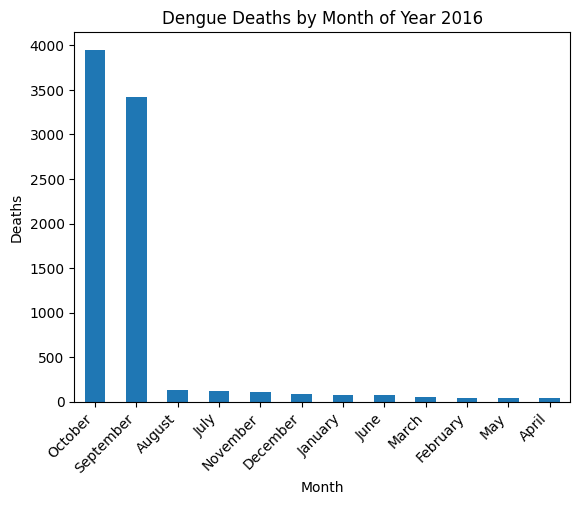

In [18]:
# Visualizing Year 2016  subset for Dengue Deaths by Month
month_2016.plot(kind = 'bar', title = 'Dengue Deaths by Month of Year 2016')
plt.ylabel('Deaths')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Analyzing further on Year 2016, the most number of death within the year was in October reaching 3,954 deaths. 

In [19]:
# Grouping by Region by Sum of Dengue cases from 2016-2020
hrc = dg.groupby('Region', observed = True)[['Dengue_Cases']].sum().sort_values(by = 'Dengue_Cases', ascending = False)
print(hrc)

             Dengue_Cases
Region                   
Region IV-A        163029
Region III         131064
Region VI          117523
NCR                115966
Region VII         110683
Region X            82437
Region XII          59802
Region I            59066
Region VIII         51983
Region IX           47781
Region II           45141
Region XIII         35293
Region XI           32522
Region IV-B         30849
CAR                 30582
Region V            22167
BARMM               11537


From 2016 - 2020, the Region which had the most number of Dengue Cases was Revion IV-A

In [20]:
# Grouping by Region by Sum of Dengue Deaths from 2016-2020
hrd = dg.groupby('Region', observed = True)[['Dengue_Deaths']].sum().sort_values(by = 'Dengue_Deaths', ascending = False)
print(hrd)

             Dengue_Deaths
Region                    
NCR                   4008
Region XII            2796
Region VI             1825
Region VII            1760
CAR                   1008
Region XIII            966
Region X               848
Region IV-A            652
Region VIII            585
Region IX              532
Region III             482
Region XI              385
BARMM                  332
Region II              193
Region V               185
Region I               157
Region IV-B            130


From 2016 - 2020, the Region which had the most number of Dengue Deaths was in NCR

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


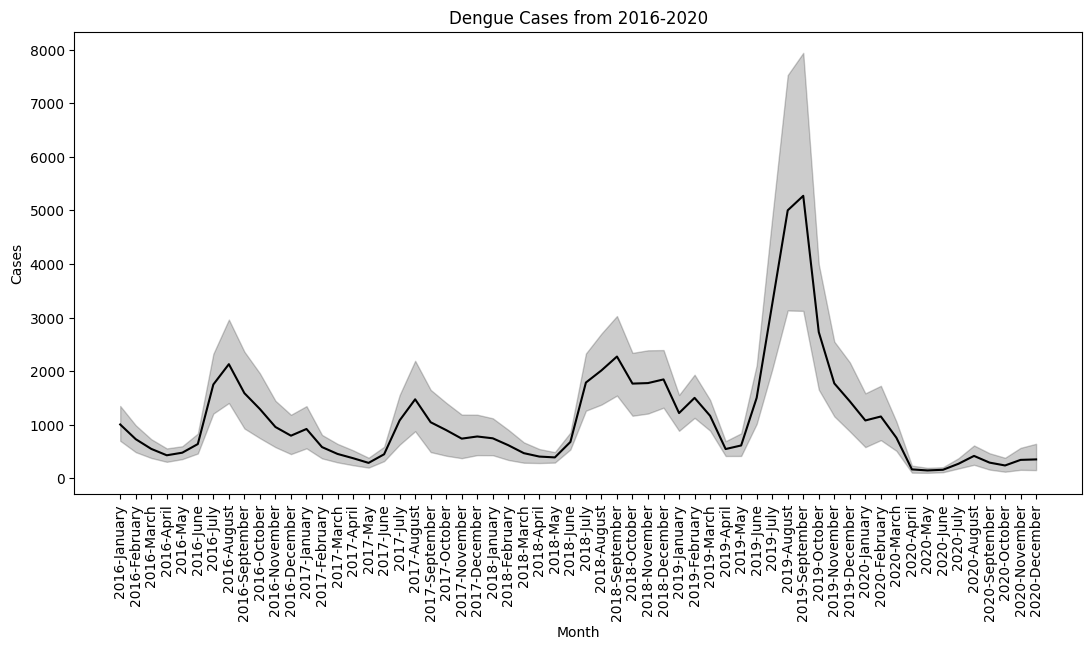

In [21]:
# Line plot for Dengue Cases for each month from 2016 - 2020
index = 0
Year_Month = []
years = [i for i in dg.Year]
for i in dg.Month:
    Year_Month.append(str(years[index])+'-'+str(i))
    index += 1
plt.figure(figsize=(13,6))
sns.lineplot(x=Year_Month,y=[i for i in dg['Dengue_Cases']],color= 'black')
plt.title(label='Dengue Cases from 2016-2020')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Cases')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


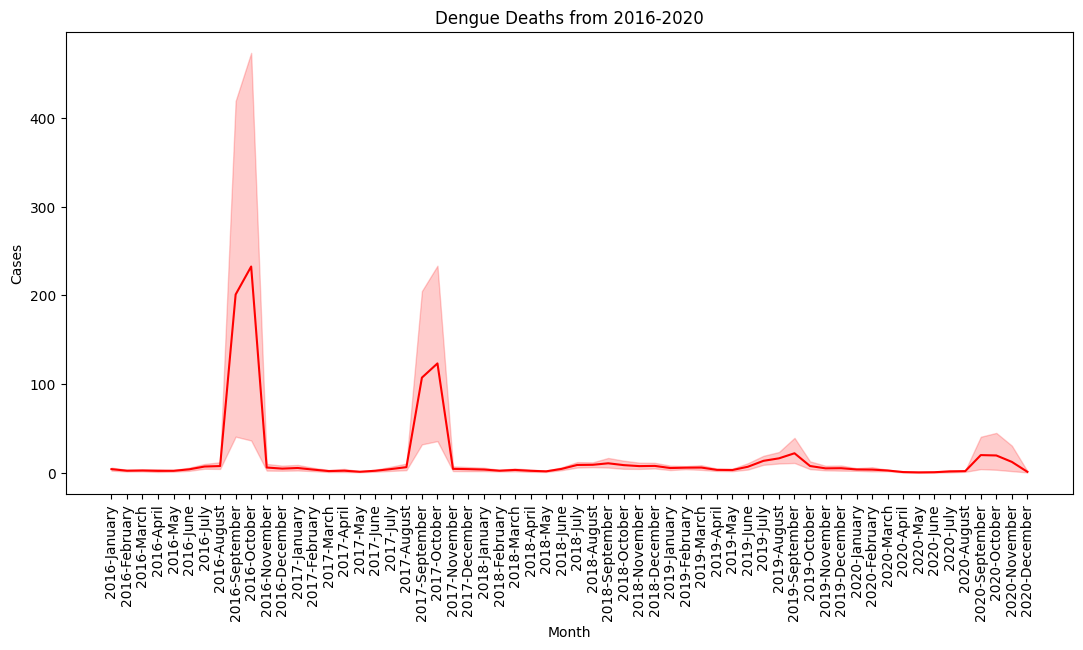

In [22]:
# Line plot for Dengue Deaths for each month from 2016 - 2020
plt.figure(figsize=(13,6))
sns.lineplot(x=Year_Month,y=[i for i in dg['Dengue_Deaths']],color= 'Red')
plt.title(label='Dengue Deaths from 2016-2020')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Cases')
plt.xticks(rotation=90)
plt.show()

After doing analysis on the data we are now able to anser the questions.

# Questions Answered

1. Which year had the most cases? *The year that had the most number of Dengue cases was in 2019*
3. At the year with highest cases, which month had the most cases?  *At 2019, which had the highest number of Dengue Cases, the month of September had the most number*
4. At which year had the highest death rate? *The year that had the most number of Dengue Deaths was in 2016*
5. Which region had the most cases? *Region IV-A had the most number of cases*
6. For the 4 years, which month had the most cases? is it the same month as #2? *Not the same, the month with the most number of cases from 2016-2020 was August*
7. Can we make regression model to predict the cases in 2025? *With the data can be possible. If available the data can also be extended to include some relevant data for additional factors e.g. rainfall, temperature. I will look further to this and try to create a predictive model*
   

# Closing 

This marks the close of my analysis. I hope the information in here has been informative. 


Would like to thank Al-Sayed Hamdy for giving me an idea from his notebook. 

*https://www.kaggle.com/code/alsayedhamdy/philippines-dengue-cases-data-analysis-and-eda*